In [29]:
          
import pandas as pd
import numpy as np
import matplotlib
import math
import seaborn as sns



import matplotlib.pyplot as plt  #Data visualisation libraries
from scipy.stats import skew
from scipy.stats.stats import pearsonr
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline


## PREPARE_DATASET

In [2]:
Version1_df = pd.read_csv("/Users/bokaili/Documents/MachineLearning/project/version1_train.csv")

train_x1 = pd.DataFrame.copy(Version1_df).drop('SalePrice', 1)

## CROSS_VALIDATION CODE

In [3]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def cv(model,data,Target,k):
    c_v = KFold(n_splits=k, shuffle=True)  #random_state=42
    score = np.sqrt(-cross_val_score(model, data.values, Target.values, scoring="neg_mean_squared_error", cv=c_v))
    print("score:", score.mean())
    return score

## MODEL_BUILDING

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge

def sLR(data_wo_target,data):
    ENet = make_pipeline(RobustScaler(), ElasticNet(0, 0))
    score = cv(ENet,data_wo_target,data.SalePrice,10)
    return score

def sLASSO(alpha,data_wo_target,data):
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha, 1))
    score = cv(ENet,data_wo_target,data.SalePrice,10)
    return score

def sRidge(alpha,data_wo_target,data):
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha, 0))
    score = cv(ENet,data_wo_target,data.SalePrice,10)
    return score

def sENet(alpha,l1_ratio,data_wo_target,data):
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha, l1_ratio))
    score = cv(ENet,data_wo_target,data.SalePrice,10)
    return score

def sKRR(alpha,data_wo_target,data):
    KRR = KernelRidge(alpha,kernel='polynomial', degree=2, coef0=2.5)
    score = cv(KRR,data_wo_target,data.SalePrice,10)
    return score



These functions will print out and return the rmse from the 10 folds cross validation given the parameters and the data set.

## TUNING PARAMETERS

### LASSO Regression

('score:', 0.11412164325352862)
('score:', 0.1146118941608659)
('score:', 0.11232824255727966)
('score:', 0.11000407752317139)
('score:', 0.10967687829566966)
('score:', 0.11177609432826081)
('score:', 0.11353591037234252)


Text(0,0.5,'RMSE')

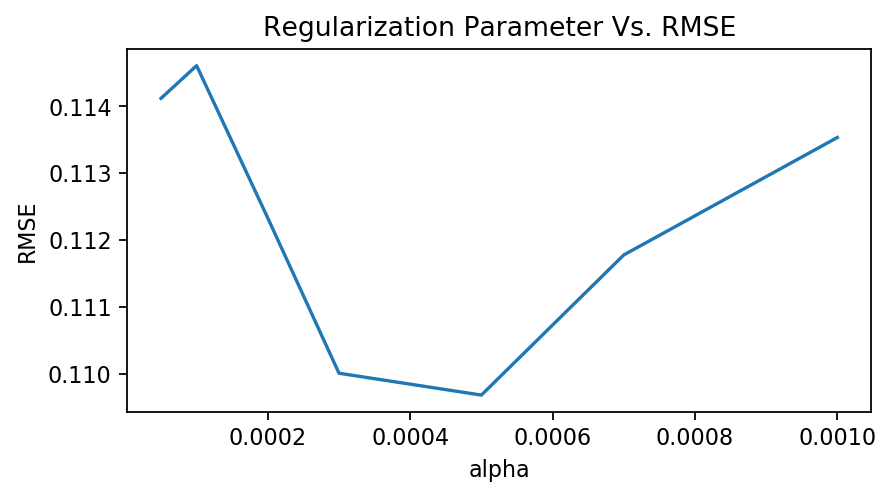

In [7]:
a_lasso = [0.00005,0.0001,0.0002,0.0003,0.0005,0.0007,0.001]

tune_lasso = [sLASSO(a,train_x1,Version1_df).mean() for a in a_lasso]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_lasso = pd.Series(tune_lasso, index = a_lasso)
tune_lasso.plot(title = "Regularization Parameter Vs. RMSE")

plt.xlabel("alpha")
plt.ylabel("RMSE")

We choose 0.0005 as alpha.

### Ridge Regression

('score:', 0.11270579611731746)
('score:', 0.11139160882858763)
('score:', 0.11220060861864636)
('score:', 0.11344835385835736)
('score:', 0.1134228790245688)
('score:', 0.11357381796733693)
('score:', 0.11564709194541374)
('score:', 0.11716828210203814)


Text(0,0.5,'RMSE')

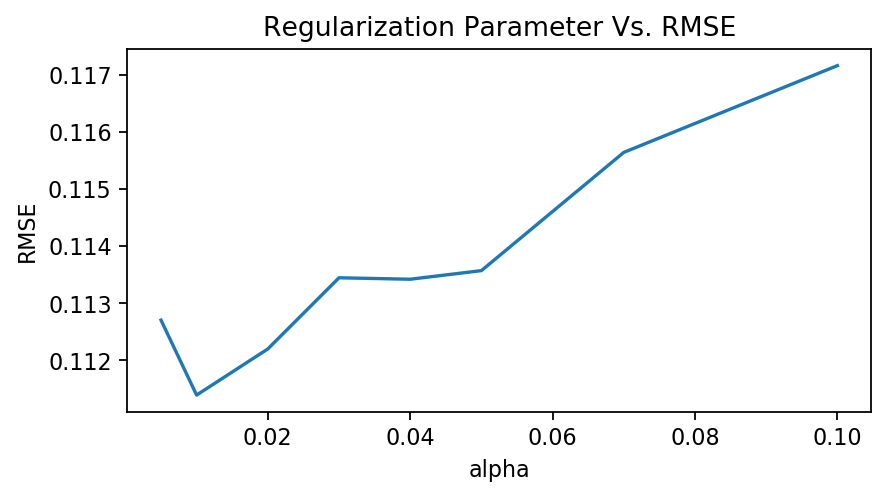

In [10]:
a_Ridge = [0.005,0.01,0.02,0.03,0.04,0.05,0.07,0.1]

tune_Ridge = [sRidge(a,train_x1,Version1_df).mean() for a in a_Ridge]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_Ridge = pd.Series(tune_Ridge, index = a_Ridge)
tune_Ridge.plot(title = "Regularization Parameter Vs. RMSE")

plt.xlabel("alpha")
plt.ylabel("RMSE")



We choose 0.01 as alpha.

### Elastic Net

Now we tune the parameters in Elastic Net. There re two parameters in Elastic Net: the coefficient of L1/L2 regularization, and the ratio we want to choose between L1 and L2 regularization.

First, let us choose a fixed ratio, let us say 0.9, to tune the coefficients.

('score:', 0.3765366555206284)
('score:', 0.3773541814958433)
('score:', 0.3787899542498511)
('score:', 0.37939978261192203)
('score:', 0.38035050101837853)
('score:', 0.3816482120750413)
('score:', 0.3825982951112695)
('score:', 0.38492501170284305)
('score:', 0.38617394046656656)
('score:', 0.38896247056350014)


Text(0,0.5,'RMSE')

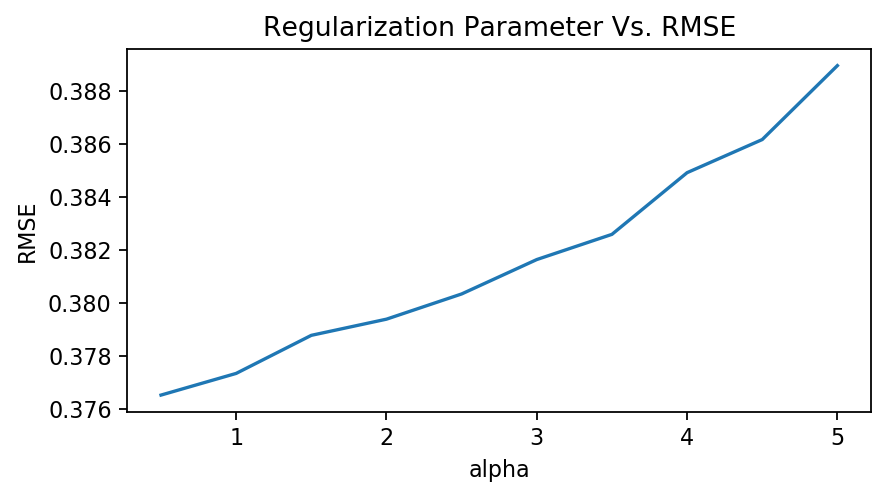

In [12]:
alphas1 = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]

tune_ENet = [sENet(a,0.9,train_x1,Version1_df).mean() for a in alphas1]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_ENet = pd.Series(tune_ENet, index = alphas1)
tune_ENet.plot(title = "Regularization Parameter Vs. RMSE")

plt.xlabel("alpha")
plt.ylabel("RMSE")



We need to zoom in the interval under 0.5.

('score:', 0.11294699838631037)
('score:', 0.11739566408566186)
('score:', 0.11999856586658583)
('score:', 0.12300318982368155)
('score:', 0.12407125132783337)
('score:', 0.1254825250542934)
('score:', 0.1261207425771717)
('score:', 0.1269956609315946)
('score:', 0.12814699942599714)
('score:', 0.12898686940241097)


Text(0,0.5,'RMSE')

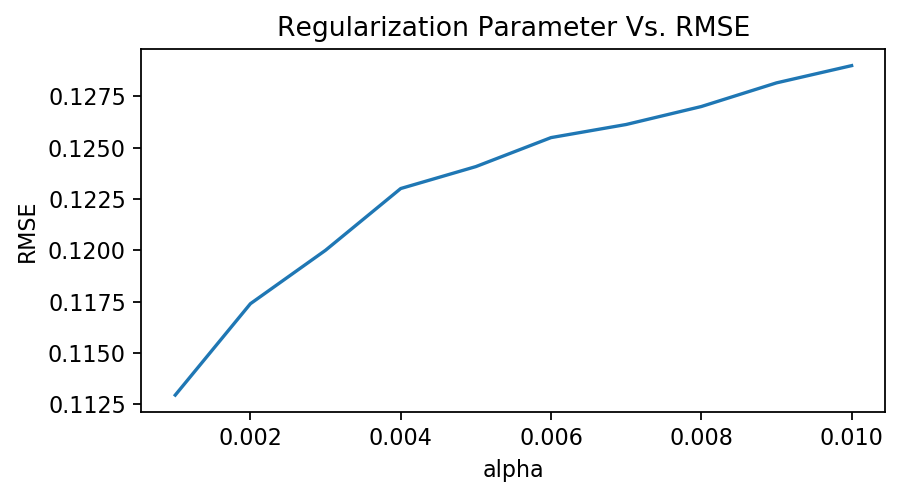

In [13]:
alphas2 = [0.001,0.002,0.003,0.004, 0.005,0.006, 0.007, 0.008,0.009,0.01]

tune_ENet = [sENet(a,0.9,train_x1,Version1_df).mean() for a in alphas2]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_ENet = pd.Series(tune_ENet, index = alphas2)
tune_ENet.plot(title = "Regularization Parameter Vs. RMSE")

plt.xlabel("alpha")
plt.ylabel("RMSE")


It looks like for any alpha greater than 0.001, the RMSE increases monotonous. We need to zoom in even deeper.

('score:', 0.11184428854794315)
('score:', 0.11217751845054318)
('score:', 0.11175828441047912)
('score:', 0.11081870210108566)
('score:', 0.11142716553280027)
('score:', 0.11149438336243782)


Text(0,0.5,'RMSE')

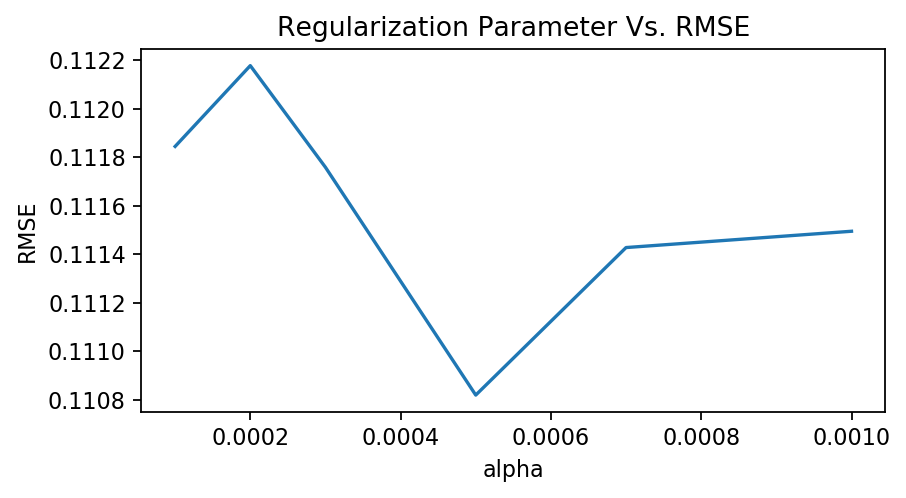

In [15]:
alphas3 = [0.0001,0.0002,0.0003,0.0005,0.0007,0.001]

tune_ENet = [sENet(a,0.9,train_x1,Version1_df).mean() for a in alphas3]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_ENet = pd.Series(tune_ENet, index = alphas3)
tune_ENet.plot(title = "Regularization Parameter Vs. RMSE")
plt.xlabel("alpha")
plt.ylabel("RMSE")

Thus we choose alpha to be 0.0005

Now we move onto tuning ratio with fixing alpha to be 0.0005

('score:', 0.11544724677101889)
('score:', 0.11277691017312004)
('score:', 0.11176441246434887)
('score:', 0.11060876250782903)
('score:', 0.11105618335990512)
('score:', 0.11138171804853288)


Text(0,0.5,'RMSE')

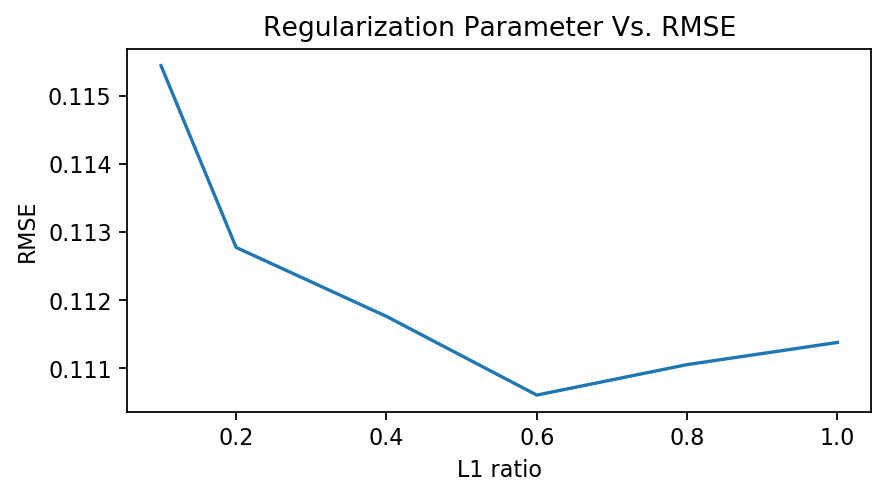

In [426]:
ratio = [0.1,0.2,0.4,0.6,0.8,1]

tune_ENet = [sENet(0.0005,r,train_x1,Version1_df).mean() for r in ratio]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_ENet = pd.Series(tune_ENet, index = ratio)
tune_ENet.plot(title = "Regularization Parameter Vs. RMSE")
plt.xlabel("L1 ratio")
plt.ylabel("RMSE")

Then we choose 0.6 as our ratio to train the model. 

Let us set the ratio as 0.6 then to see whether we have tuned the alpha correctly

('score:', 0.1129749802902887)
('score:', 0.11426172447084681)
('score:', 0.11180285116879454)
('score:', 0.1101713774685779)
('score:', 0.11147578487088206)
('score:', 0.11232064937515204)
('score:', 0.11392711909077961)


Text(0,0.5,'RMSE')

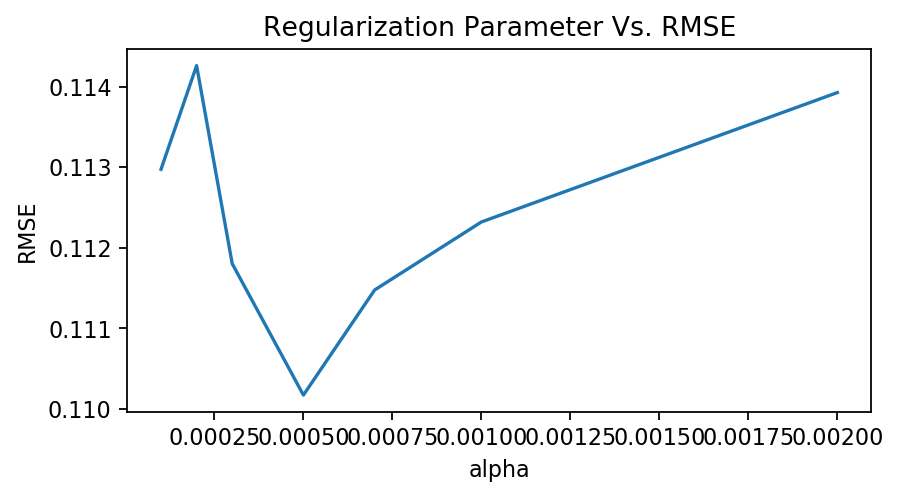

In [460]:
alphas3 = [0.0001,0.0002,0.0003,0.0005,0.0007,0.001,0.002]

tune_ENet = [sENet(a,0.6,train_x1,Version1_df).mean() for a in alphas3]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_ENet = pd.Series(tune_ENet, index = alphas3)
tune_ENet.plot(title = "Regularization Parameter Vs. RMSE")
plt.xlabel("alpha")
plt.ylabel("RMSE")

Optimized alpha has not changed.

### Polynomial Kernel Ridge Regression

('score:', 0.12113528504523223)
('score:', 0.11796001960986431)
('score:', 0.11420651893907789)
('score:', 0.11376808191413265)
('score:', 0.11311196151127738)
('score:', 0.1133071830362464)
('score:', 0.1144642730326314)


Text(0,0.5,'RMSE')

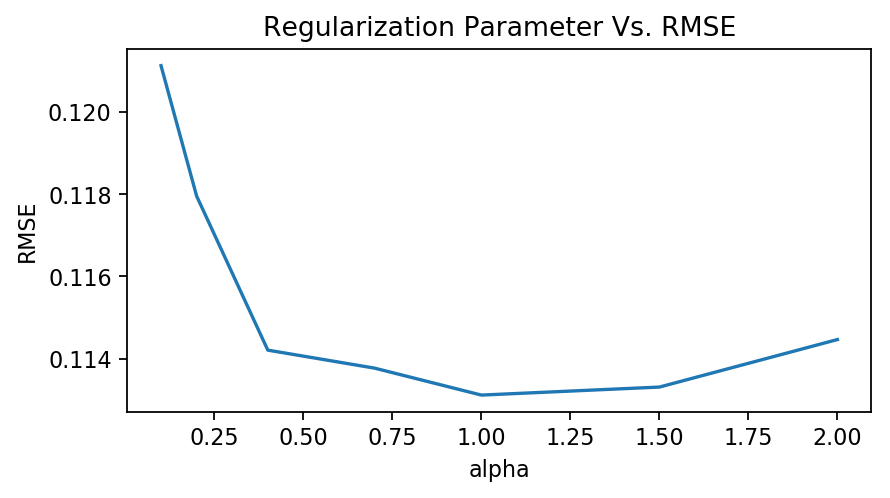

In [415]:
alphas4 = [0.1,0.2,0.4,0.7,1,1.5,2]

tune_GKRR = [sKRR(a,train_x1,Version1_df).mean() for a in alphas4]

fig=plt.figure(figsize=(6, 3), dpi= 80)
tune_GKRR = pd.Series(tune_GKRR, index = alphas4)
tune_GKRR.plot(title = "Regularization Parameter Vs. RMSE")

plt.xlabel("alpha")
plt.ylabel("RMSE")



We choose 1 as alpha.

In [16]:
Version2_df = pd.read_csv("/Users/bokaili/Documents/MachineLearning/project/train001.csv")
test_x2 = pd.read_csv("/Users/bokaili/Documents/MachineLearning/project/test001.csv")

train_x2 = pd.DataFrame.copy(Version1_df).drop('SalePrice', 1)


knn_df = pd.read_csv("/Users/bokaili/Documents/MachineLearning/project/knn_train2.csv")
knn_test = pd.read_csv("/Users/bokaili/Documents/MachineLearning/project/knn_test2.csv")

train_knn = pd.DataFrame.copy(knn_df).drop('SalePrice', 1)


LR_df = pd.read_csv("/Users/bokaili/Documents/MachineLearning/project/linearregression_train2.csv")
LR_test = pd.read_csv("/Users/bokaili/Documents/MachineLearning/project/linearregression_test2.csv")

train_LR = pd.DataFrame.copy(LR_df).drop('SalePrice', 1)

## Optimized Models

In [17]:
LR = make_pipeline(RobustScaler(), ElasticNet(0, 0))

lasso = make_pipeline(RobustScaler(), ElasticNet(0.0005, 1))

Ridge = make_pipeline(RobustScaler(), ElasticNet(0.01, 0))

ENet = make_pipeline(RobustScaler(), ElasticNet(0.0005, 0.6))

KRR = KernelRidge(1,kernel='polynomial', degree=2, coef0=2.5)

Pluge in the optimized parameters.

Check the difference rmse score using different preprocessed data. 

In [18]:
cv_lasso_og = cv(lasso,train_x2,Version2_df.SalePrice,10).mean()
cv_lasso_knn = cv(lasso,train_knn,knn_df.SalePrice,10).mean()
cv_lasso_lr = cv(lasso,train_LR,LR_df.SalePrice,10).mean()

('score:', 0.1104467992469856)
('score:', 0.1342017442055125)
('score:', 0.13475941199375008)


In [19]:
cv_ENet_og = cv(ENet,train_x2,Version2_df.SalePrice,10).mean()
cv_ENet_knn = cv(ENet,train_knn,knn_df.SalePrice,10).mean()
cv_ENet_lr = cv(ENet,train_LR,LR_df.SalePrice,10).mean()

('score:', 0.11037968869763978)
('score:', 0.13682638674048894)
('score:', 0.13795112666197434)


In [20]:
cv_KRR_og = cv(KRR,train_x2,Version2_df.SalePrice,10).mean()
cv_KRR_knn = cv(KRR,train_knn,knn_df.SalePrice,10).mean()
cv_KRR_lr = cv(KRR,train_LR,LR_df.SalePrice,10).mean()

('score:', 0.11267138472582575)
('score:', 0.13616445196054291)
('score:', 0.13748336914806297)


In [27]:
cv_LR = cv(LR,train_x2,Version2_df.SalePrice,10).mean()

cv_LASSO = cv(lasso,train_x2,Version2_df.SalePrice,10).mean()

cv_Ridge = cv(Ridge,train_x2,Version2_df.SalePrice,10).mean()

cv_ENet = cv(ENet,train_x2,Version2_df.SalePrice,10).mean()

cv_KRR = cv(KRR,train_x2,Version2_df.SalePrice,10).mean()

('score:', 0.12084757985005909)
('score:', 0.11139605541325943)
('score:', 0.11235689232370354)
('score:', 0.1110238372414796)
('score:', 0.11318434484807652)


In [28]:
results = pd.DataFrame({
    'Model': ['LR',
              'Ridge',
              'Lasso',
              'ElasticNet',
              'Kernel Ridge'],
    'Score': [cv_LR,
              cv_Ridge,
              cv_LASSO,
              cv_ENet,
              cv_KRR]})

result_df = results.sort_values(by='Score', ascending=True).reset_index()
result_df.head(8)

,index,Model,Score
0,3,ElasticNet,0.111024
1,2,Lasso,0.111396
2,1,Ridge,0.112357
3,4,Kernel Ridge,0.113184
4,0,LR,0.120848


This ranks the rmse score from low to high.

Text(0.5,1,'RMSE')

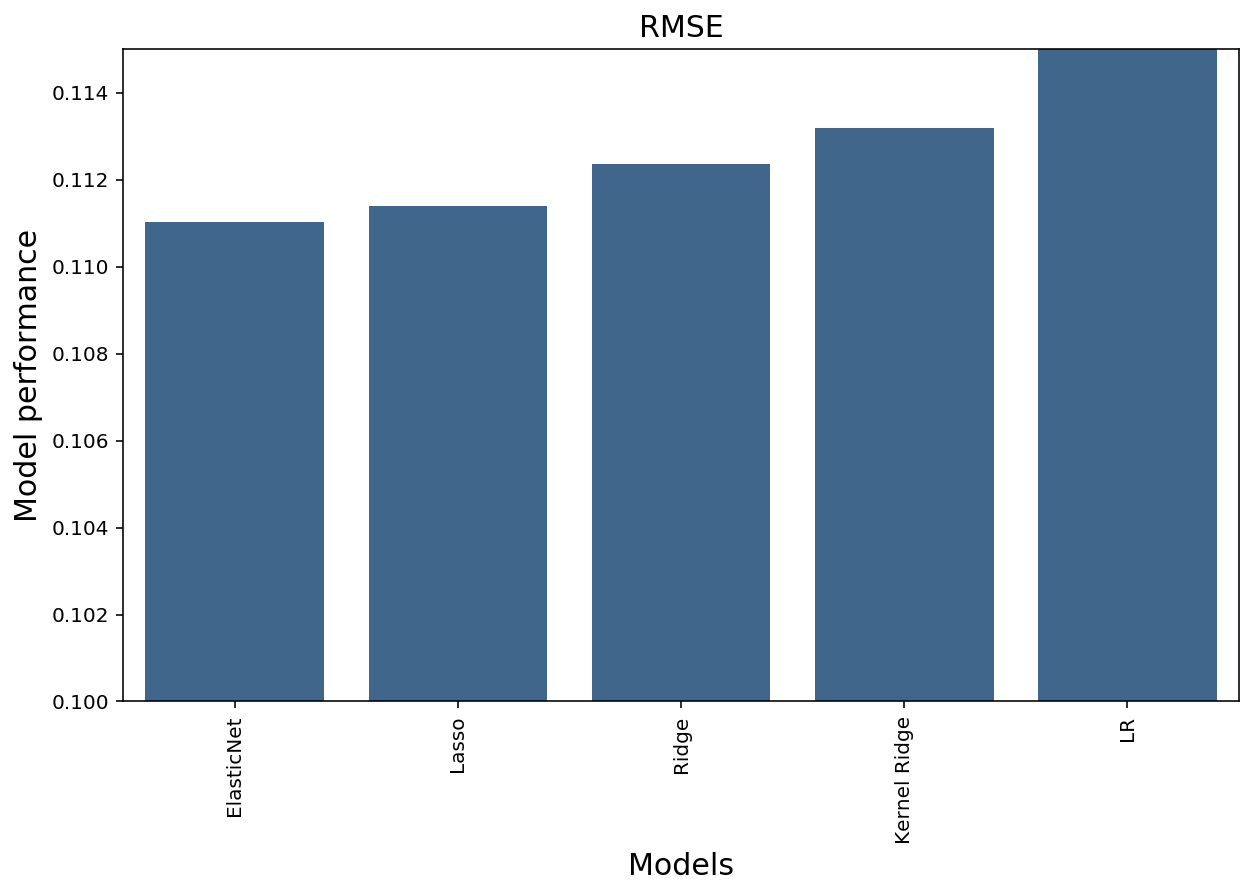

In [30]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'],color=(0.2,0.4,0.6,0.6))
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model performance', fontsize=15)
plt.ylim(0.10, 0.115)
plt.title('RMSE', fontsize=15)
